In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

data22 = pd.read_csv('../../data/training/EPHARG_train_22.csv')
data23 = pd.read_csv('../../data/training/EPHARG_train_23.csv')
data24 = pd.read_csv('../../data/training/EPHARG_train_24.csv')
data24.drop(columns = ["V2_01_M", "V2_02_M", "V2_03_M","V5_01_M", "V5_02_M", "V5_03_M"], inplace=True)
data25 = pd.read_csv('../../data/training/EPHARG_train_25.csv')
data25.drop(columns = ["V2_01_M", "V2_02_M", "V2_03_M","V5_01_M", "V5_02_M", "V5_03_M"], inplace=True)
data = pd.concat([data22, data23, data24, data25], ignore_index=True)
pd.set_option('display.max_columns', None)
print(data.head(10))

                          CODUSU  ANO4  TRIMESTRE  AGLOMERADO  V01  H05  H06  \
0  TQRMNOPPQHJKKSCDEHJGH00790191  2022          3          23  1.0  3.0  3.0   
1  TQRMNOPPQHJKLLCDEGOIH00783953  2022          3          18  2.0  1.0  9.0   
2  TQRMNOPPQHJKLLCDEGOIH00783953  2022          2          18  2.0  1.0  9.0   
3  TQRMNOPPQHJKLLCDEGOIH00783953  2022          3          18  2.0  1.0  9.0   
4  TQRMNOPPQHJKLLCDEGOIH00783953  2022          2          18  2.0  1.0  9.0   
5  TQRMNOPPQHJKTMCDEIJAH00786549  2022          2          33  1.0  1.0  3.0   
6  TQRMNOPPQHJKTMCDEIJAH00786549  2022          2          33  1.0  1.0  3.0   
7  TQRMNOPPQHJKTMCDEIJAH00786549  2022          2          33  1.0  1.0  3.0   
8  TQRMNOPPQHJKTMCDEIJAH00786549  2022          3          33  1.0  1.0  3.0   
9  TQRMNOPPQHJKTMCDEIJAH00786549  2022          3          33  1.0  1.0  3.0   

   H07  H08  H09  H10  H11  H12  H16  H15  PROP  H14  H13  IX_TOT  CAT_INAC  \
0  1.0  1.0  1.0  1.0  1.0  1.0  4.0  1.

In [2]:
print(data.columns)
print(data.dtypes)
print(data['H11'].value_counts())

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'AGLOMERADO', 'V01', 'H05', 'H06', 'H07',
       'H08', 'H09', 'H10', 'H11', 'H12', 'H16', 'H15', 'PROP', 'H14', 'H13',
       'IX_TOT', 'CAT_INAC', 'CAT_OCUP', 'P02', 'P03', 'CH07', 'P07', 'P08',
       'P09', 'P10', 'P05', 'CONDACT', 'P21', 'P47T', 'PP07G1', 'PP07G2',
       'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K',
       'PP08D1', 'TOT_P12', 'T_VI', 'V12_M', 'V2_M', 'V3_M', 'V5_M', 'Region',
       'Q', 'AGLO_rk', 'Reg_rk', 'INGRESO', 'INGRESO_NLB', 'INGRESO_JUB',
       'INGRESO_SBS'],
      dtype='object')
CODUSU          object
ANO4             int64
TRIMESTRE        int64
AGLOMERADO       int64
V01            float64
H05            float64
H06            float64
H07            float64
H08            float64
H09            float64
H10            float64
H11            float64
H12            float64
H16            float64
H15            float64
PROP           float64
H14            float64
H13            float64
IX_T

<Axes: title={'center': 'Total Ingresos por asistencia educativa'}, xlabel='P08'>

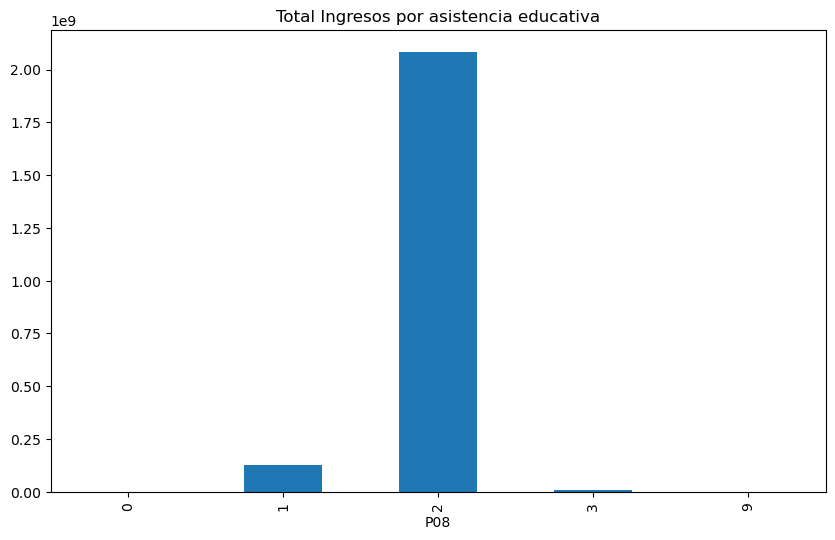

In [ ]:
#Grafico de suma de Ingresos por asistencia educativa
data.groupby('P08')['P47T'].sum().plot(kind='bar', figsize=(10, 6), title='Total Ingresos por asistencia educativa')

<Axes: title={'center': 'Total Ingresos por sexo'}, xlabel='P02'>

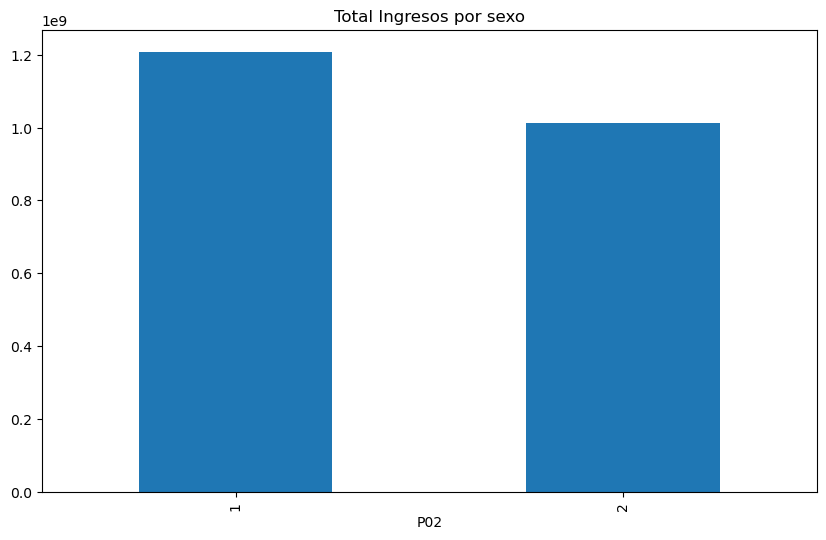

In [4]:
#Grafico de suma de Ingresos por sexo
data.groupby('P02')['P47T'].sum().plot(kind='bar', figsize=(10, 6), title='Total Ingresos por sexo')

<Axes: title={'center': 'Total Ingresos por completitud de educacion'}, xlabel='P10'>

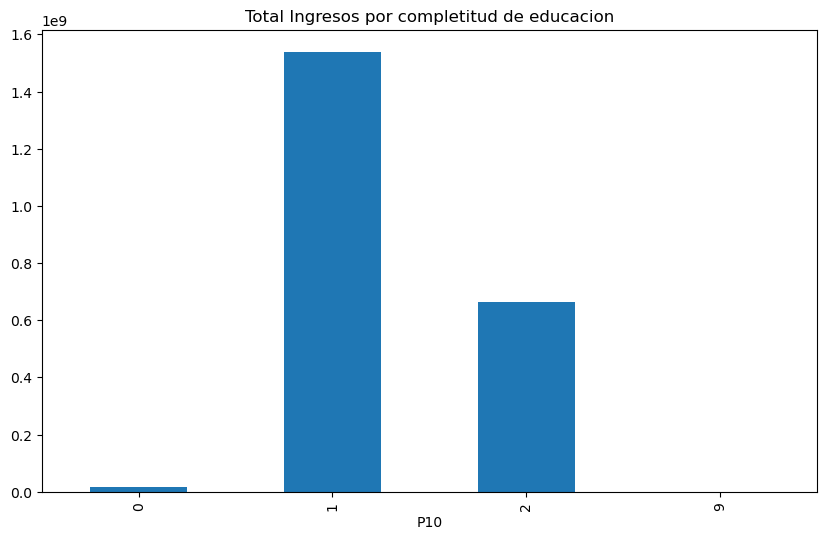

In [5]:
#Grafico de suma de Ingresos por sexo
data.groupby('P10')['P47T'].sum().plot(kind='bar', figsize=(10, 6), title='Total Ingresos por completitud de educacion')

In [ ]:
#Intento reducir la cardinalidad de las variables categoricas
data['H07'] = data['H07'].map({0:0, 1: 1, 2: 0}) 
data['H10'] = data['H10'].map({0:0, 1: 1, 2: 0}) 
data['H11'] = data['H11'].map({0:0,1: 1, 2: 0}) 
data['P07'] = data['P07'].map({0:0,1: 1, 2: 0}) 
data['P05'] = data['P05'].map({0:0,1: 1, 2: 0}) 
data['P08'] = data['P08'].map({0:0,1: 1, 2:1, 3:3,9:0}) 
data['P09'] = data['P09'].map({0:0,9:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8}) 
data['PP07G_59'] = data['PP07G_59'].map({0:0, 5:5,1:0}) 


In [7]:
data = data.astype({'ANO4': 'category', 'TRIMESTRE': 'category', 'AGLOMERADO': 'category', 'V01': 'category', 'H05': 'category', 
                    'H06': 'category', 'H08': 'category', 'H09':'category','H12':'category', 'PROP':'category', 'H14':'category','H13':'category',
                    'CAT_INAC':'category', 'CAT_OCUP':'category', 'CH07':'category', 'P10':'category','P05':'category'
                    ,'PP07G1':'category', 'PP07G2':'category','PP07G3':'category', 'PP07G4':'category','PP07H':'category',
                    'PP07I':'category', 'PP07J':'category', 'PP07K':'category','Region':'category', 'P08':'category', 'P09':'category','CONDACT':'category','PP07G_59':'category', 'P02':'category'})

data.dtypes

CODUSU           object
ANO4           category
TRIMESTRE      category
AGLOMERADO     category
V01            category
H05            category
H06            category
H07               int64
H08            category
H09            category
H10               int64
H11               int64
H12            category
H16             float64
H15             float64
PROP           category
H14            category
H13            category
IX_TOT            int64
CAT_INAC       category
CAT_OCUP       category
P02            category
P03               int64
CH07           category
P07               int64
P08            category
P09            category
P10            category
P05            category
CONDACT        category
P21             float64
P47T            float64
PP07G1         category
PP07G2         category
PP07G3         category
PP07G4         category
PP07G_59       category
PP07H          category
PP07I          category
PP07J          category
PP07K          category
PP08D1          

In [57]:
print(data.groupby('ANO4')['P47T'].describe())
print(data[data['P47T']>0].groupby('ANO4')['P47T'].describe())

         count         mean          std  min  25%     50%     75%        max
ANO4                                                                         
2022  189581.0  3799.434416  5721.481916  0.0  0.0  2397.0  5729.0   379516.0
2023  199766.0  3468.030300  8220.986297  0.0  0.0  1572.0  5121.0  2652257.0
2024  198604.0  3100.151165  5482.849797  0.0  0.0  1054.0  4514.0   556006.0
2025   47950.0  3983.775746  6648.138002  0.0  0.0  1354.0  5828.0   242845.0
         count         mean           std   min     25%     50%     75%  \
ANO4                                                                      
2022  113452.0  6348.945598   6206.037644  14.0  3043.0  4795.0  8031.0   
2023  111321.0  6223.394876  10204.581422  24.0  2881.0  4674.0  7859.0   
2024  106651.0  5773.058124   6367.858356  11.0  2586.0  4184.0  7356.0   
2025   25653.0  7446.382372   7538.567545  29.0  3206.0  5537.0  9714.0   

            max  
ANO4             
2022   379516.0  
2023  2652257.0  
2024   55

C:\Users\uzvp\AppData\Local\Temp\ipykernel_44044\2043014692.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('ANO4')['P47T'].describe())
C:\Users\uzvp\AppData\Local\Temp\ipykernel_44044\2043014692.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data[data['P47T']>0].groupby('ANO4')['P47T'].describe())


In [8]:
data['logP47T'] = np.where(data['P47T'] > 0, np.log10(data['P47T']), np.nan)
print(data.groupby('ANO4')['P47T'].describe())
print(data.groupby('ANO4')['logP47T'].describe())

         count         mean          std  min  25%     50%     75%        max
ANO4                                                                         
2022  189581.0  3799.434416  5721.481916  0.0  0.0  2397.0  5729.0   379516.0
2023  199766.0  3468.030300  8220.986297  0.0  0.0  1572.0  5121.0  2652257.0
2024  198604.0  3100.151165  5482.849797  0.0  0.0  1054.0  4514.0   556006.0
2025   47950.0  3983.775746  6648.138002  0.0  0.0  1354.0  5828.0   242845.0
         count      mean       std       min       25%       50%       75%  \
ANO4                                                                         
2022  113452.0  3.664956  0.364516  1.146128  3.483302  3.680789  3.904770   
2023  111321.0  3.646255  0.377705  1.380211  3.459543  3.669689  3.895367   
2024  106651.0  3.602705  0.395974  1.041393  3.412629  3.621592  3.866642   
2025   25653.0  3.718522  0.390689  1.462398  3.505964  3.743275  3.987398   

           max  
ANO4            
2022  5.579230  
2023  6.4236

c:\ProgramData\Miniconda3\envs\env_jupyter\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\uzvp\AppData\Local\Temp\ipykernel_17240\2649757281.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('ANO4')['P47T'].describe())
C:\Users\uzvp\AppData\Local\Temp\ipykernel_17240\2649757281.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('ANO4')['logP47T'].describe())


<Axes: title={'center': 'logP47T'}, xlabel='ANO4'>

<Figure size 1000x600 with 0 Axes>

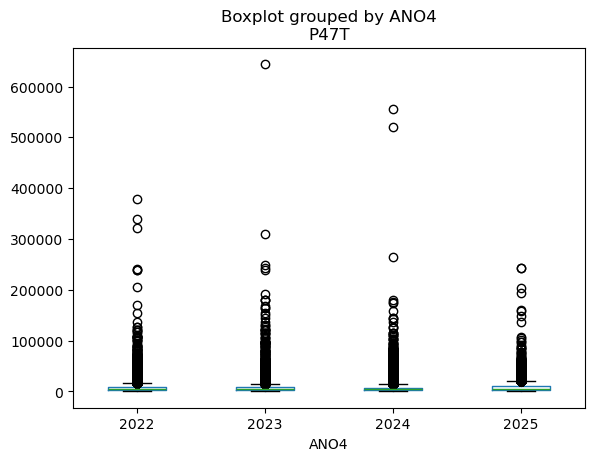

<Figure size 1000x600 with 0 Axes>

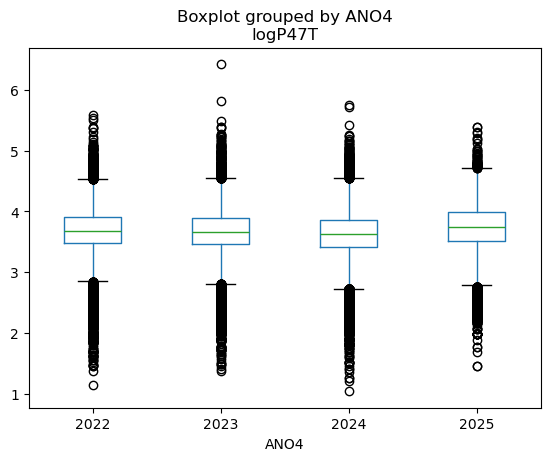

In [9]:
#Boxplot of P47T by ANO4
plt.figure(figsize=(10, 6))
data[(data['P47T'] < 1000000) & (data['P47T'] > 0)].boxplot(column='P47T', by='ANO4', grid = False)
#Boxplot of logP47T by ANO4
plt.figure(figsize=(10, 6))
data[data['logP47T'] > 0].boxplot(column='logP47T', by='ANO4', grid = False)


<Axes: >

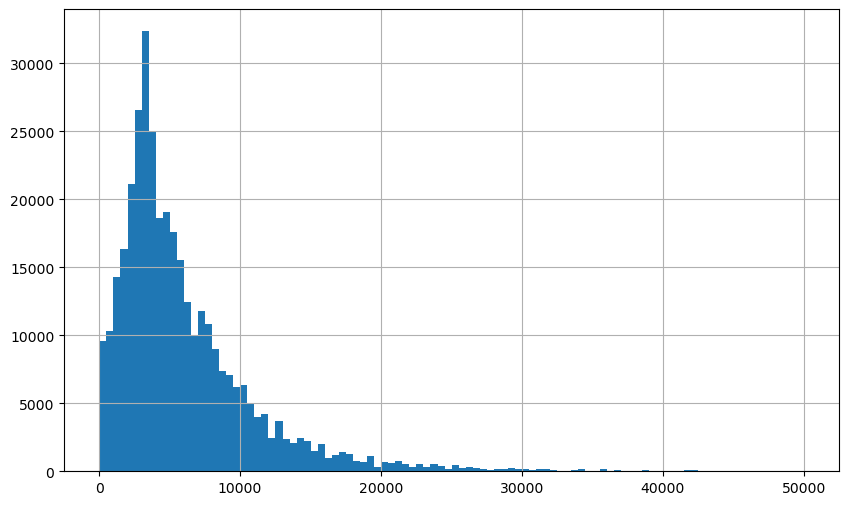

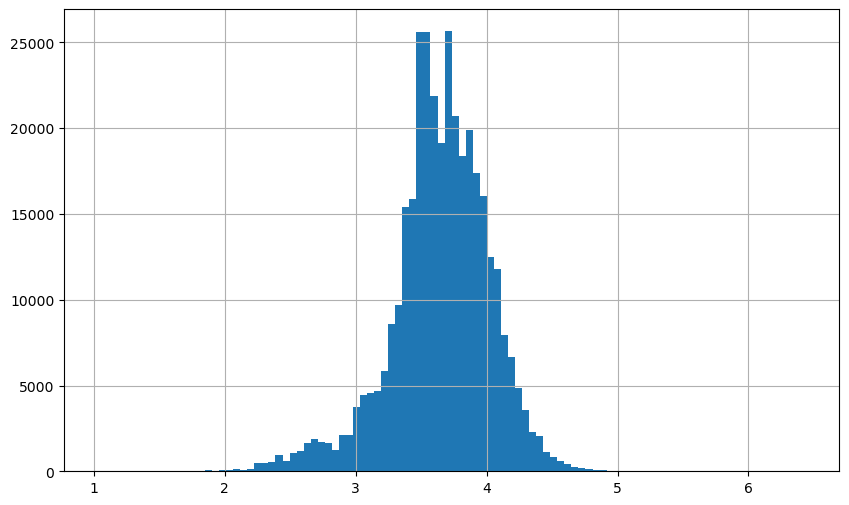

In [10]:
data_viz = data[(data['P47T'] < 50000) & data['P47T'] > 0]
plt.figure(figsize=(10, 6))
data_viz['P47T'].hist(bins=100)
plt.figure(figsize=(10, 6))
data['logP47T'].hist(bins=100)

C:\Users\uzvp\AppData\Local\Temp\ipykernel_17240\3272745486.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_sum = data.groupby('Region')['P47T'].sum().reset_index()
C:\Users\uzvp\AppData\Local\Temp\ipykernel_17240\3272745486.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alg_sum = data.groupby('AGLOMERADO')['P47T'].sum().reset_index()


<Axes: xlabel='AGLOMERADO'>

<Figure size 1000x600 with 0 Axes>

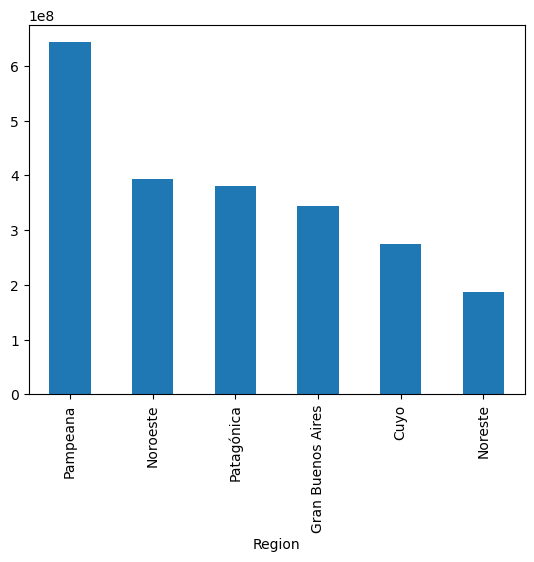

<Figure size 1000x600 with 0 Axes>

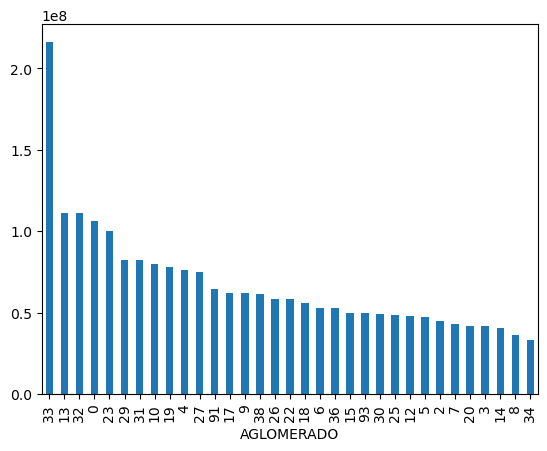

In [11]:
#Column chart, sum of P47T by Region
region_sum = data.groupby('Region')['P47T'].sum().reset_index()
region_sum = region_sum.sort_values(by='P47T', ascending=False)
plt.figure(figsize=(10, 6))
region_sum.plot(kind='bar', x='Region', y='P47T', legend=False)

alg_sum = data.groupby('AGLOMERADO')['P47T'].sum().reset_index()
alg_sum = alg_sum.sort_values(by='P47T', ascending=False)
plt.figure(figsize=(10, 6))
alg_sum.plot(kind='bar', x='AGLOMERADO', y='P47T', legend=False)


In [12]:
#Identificar Outliers de P47T
Q1 = data['P47T'].quantile(0.25)
Q3 = data['P47T'].quantile(0.75)
logQ1 = data['logP47T'].quantile(0.25)
logQ3 = data['logP47T'].quantile(0.75)
IQR = Q3 - Q1
logIQR = logQ3 - logQ1
outliers = data[(data['P47T'] < (Q1 - 1.5 * IQR)) | (data['P47T'] > (Q3 + 1.5 * IQR))]
print(f'Number of outliers in P47T: {outliers.shape[0]}')
log_outliers = data[(data['logP47T'] < (logQ1 - 1.5 * logIQR)) | (data['logP47T'] > (logQ3 + 1.5 * logIQR))]
print(f'Number of outliers in P47T: {log_outliers.shape[0]}')


Number of outliers in P47T: 31597
Number of outliers in P47T: 14432


<Axes: >

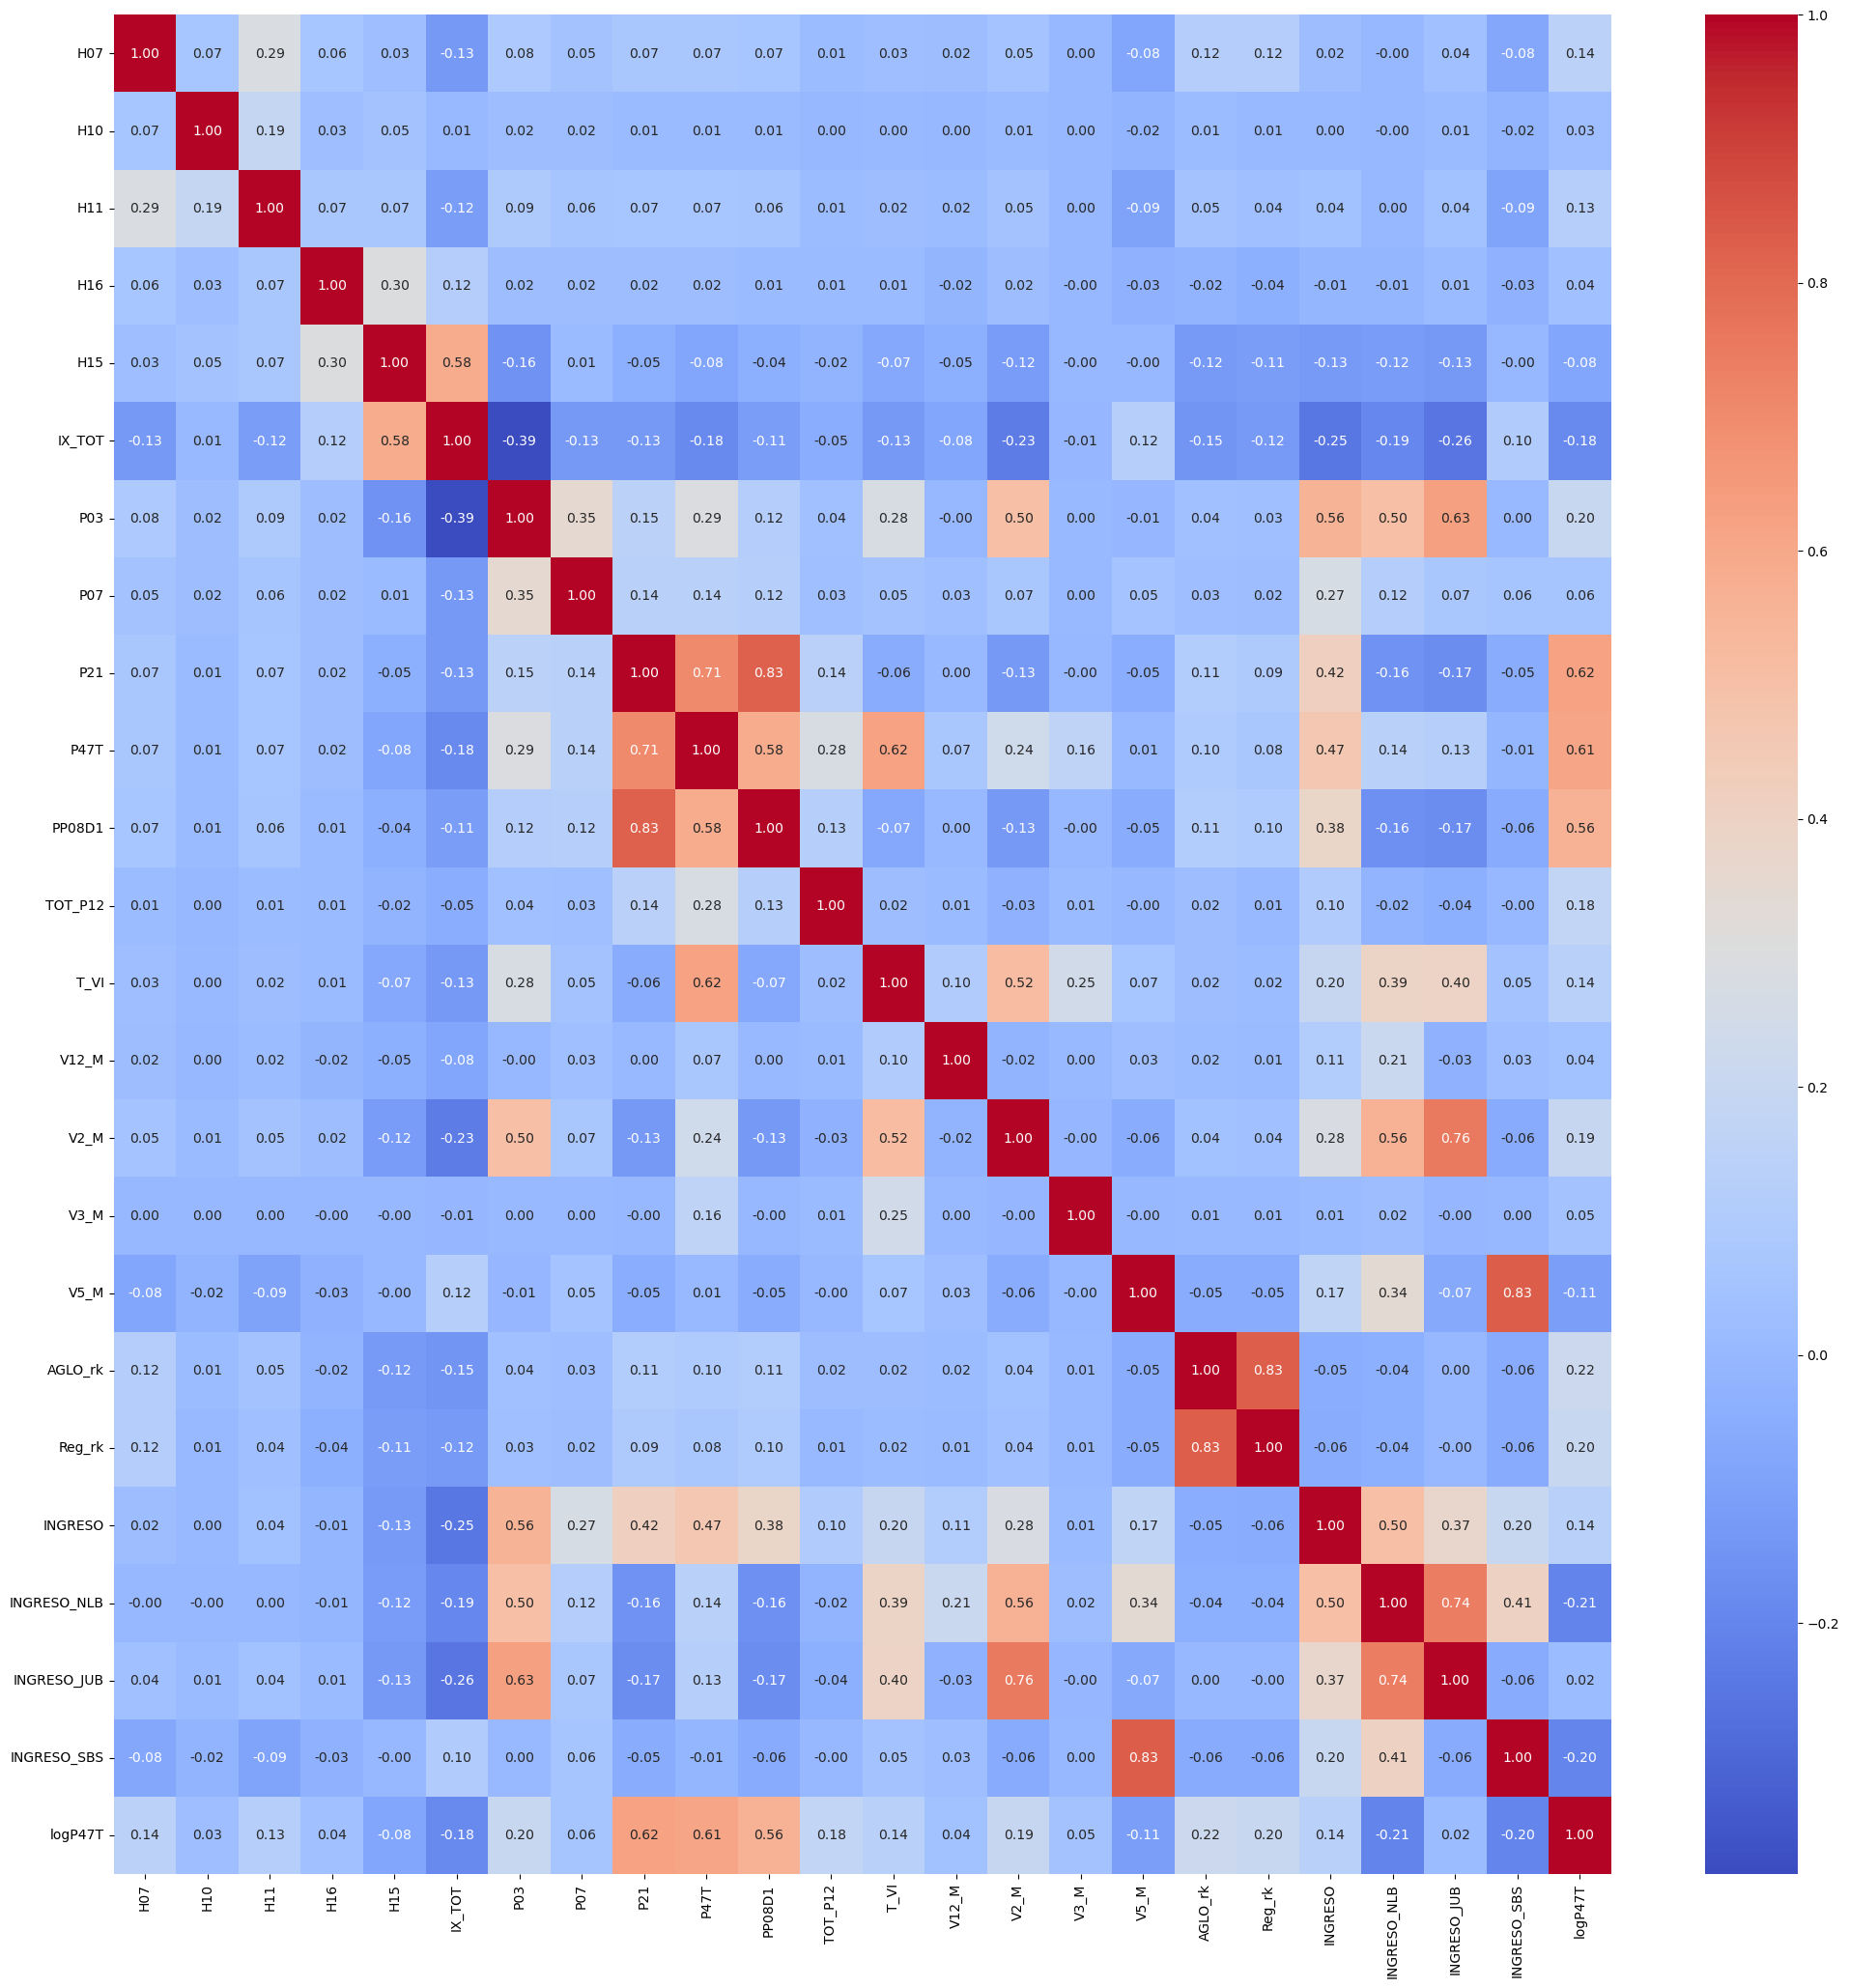

In [13]:
#correlation matrix for numerical features
numerical_features = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)


In [14]:
print(data.columns)
print(data.dtypes)
print(data.head(10))

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'AGLOMERADO', 'V01', 'H05', 'H06', 'H07',
       'H08', 'H09', 'H10', 'H11', 'H12', 'H16', 'H15', 'PROP', 'H14', 'H13',
       'IX_TOT', 'CAT_INAC', 'CAT_OCUP', 'P02', 'P03', 'CH07', 'P07', 'P08',
       'P09', 'P10', 'P05', 'CONDACT', 'P21', 'P47T', 'PP07G1', 'PP07G2',
       'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K',
       'PP08D1', 'TOT_P12', 'T_VI', 'V12_M', 'V2_M', 'V3_M', 'V5_M', 'Region',
       'Q', 'AGLO_rk', 'Reg_rk', 'INGRESO', 'INGRESO_NLB', 'INGRESO_JUB',
       'INGRESO_SBS', 'logP47T'],
      dtype='object')
CODUSU           object
ANO4           category
TRIMESTRE      category
AGLOMERADO     category
V01            category
H05            category
H06            category
H07               int64
H08            category
H09            category
H10               int64
H11               int64
H12            category
H16             float64
H15             float64
PROP           category
H14            category

In [15]:
print(data['H12'].value_counts())

H12
1.0    491632
2.0    106993
3.0     34530
0.0      1412
4.0      1334
Name: count, dtype: int64


In [16]:
#Intento reducir registros por categoria, quiero reducir cardinalidad de variables categoricas
data['V01'] = data['V01'].map({0:0,1:1,2:2,3:0,4:0,5:0,6:0}) 
data['H05'] = data['H05'].map({0:0,1:1,2:2,3:0,4:0}) 
data['H06'] = data['H06'].map({0:0,1:1,2:2,3:3,4:4,5:0,6:0,7:0,9:9}) 
data['H08'] = data['H08'].map({0:0,1:1,2:0,3:0})
data['H12'] = data['H12'].map({0:0,1:1,2:2,3:0,4:0})
data['PROP'] = data['PROP'].map({0:0,1:1,2:2,3:3,4:0,5:0})
data['H14'] = data['H14'].map({0:0,1:1,2:2,3:3,4:0,5:0})
data['H13'] = data['H13'].map({0:0,1:1,2:0,4:0})
data['P10'] = data['P10'].map({0:0,1:1,2:2,9:0})
#Todas las columnas de arriba son categoricas, las convierto a category
data = data.astype({'V01': 'category', 'H05': 'category', 'H06': 'category', 'H08': 'category', 
                    'H12':'category', 'PROP':'category', 'H14':'category','H13':'category','P10':'category'})
categorical_columns = data.select_dtypes(include=['category']).columns
print(data.columns)
print(data.dtypes)
for col in categorical_columns:
    print(f'Column: {col}')
    print(data[col].value_counts())
    print('-----------------------')

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'AGLOMERADO', 'V01', 'H05', 'H06', 'H07',
       'H08', 'H09', 'H10', 'H11', 'H12', 'H16', 'H15', 'PROP', 'H14', 'H13',
       'IX_TOT', 'CAT_INAC', 'CAT_OCUP', 'P02', 'P03', 'CH07', 'P07', 'P08',
       'P09', 'P10', 'P05', 'CONDACT', 'P21', 'P47T', 'PP07G1', 'PP07G2',
       'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K',
       'PP08D1', 'TOT_P12', 'T_VI', 'V12_M', 'V2_M', 'V3_M', 'V5_M', 'Region',
       'Q', 'AGLO_rk', 'Reg_rk', 'INGRESO', 'INGRESO_NLB', 'INGRESO_JUB',
       'INGRESO_SBS', 'logP47T'],
      dtype='object')
CODUSU           object
ANO4           category
TRIMESTRE      category
AGLOMERADO     category
V01            category
H05            category
H06            category
H07               int64
H08            category
H09            category
H10               int64
H11               int64
H12            category
H16             float64
H15             float64
PROP           category
H14            category

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer



In [18]:
drop_cols = [c for c in ['Cobra', 'INGRESO','P47T', 'logP47T', 'CODUSU', 'Q', 'Reg_rk', 'AGLO_rk', 'INGRESO_NLB', 'INGRESO_JUB','INGRESO_SBS', 
                         'P21','PP08D1','T_VI','V12_M','V2_M','V3_M','V5_M','TOT_P12','PP07H','PP07I','PP07J','PP07G_59','PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07K'] if c in data.columns]
X = data.drop(columns=drop_cols)
y = data['INGRESO'] 
X_train_test, X_val, y_train_test, y_val = train_test_split(X, y, test_size=0.10, random_state=42) #Separo 10% para validacion
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=2/9, random_state=42) #Separo 20% total para test, 70% Train
print(X.dtypes)

ANO4          category
TRIMESTRE     category
AGLOMERADO    category
V01           category
H05           category
H06           category
H07              int64
H08           category
H09           category
H10              int64
H11              int64
H12           category
H16            float64
H15            float64
PROP          category
H14           category
H13           category
IX_TOT           int64
CAT_INAC      category
CAT_OCUP      category
P02           category
P03              int64
CH07          category
P07              int64
P08           category
P09           category
P10           category
P05           category
CONDACT       category
Region        category
dtype: object


In [19]:
print(f'Train set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')
print(f'Validation set size: {X_val.shape[0]} samples')

Train set size: 445130 samples
Test set size: 127180 samples
Validation set size: 63591 samples


In [20]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor_numonly_scaled = ColumnTransformer([('num', StandardScaler(), numeric_cols)], remainder='drop')

preprocessor_numonly_unscaled = ColumnTransformer([('num', 'passthrough', numeric_cols)], remainder='drop')

preprocessor_scaled = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

preprocessor_scaled_cat = ColumnTransformer([
    ('num', 'passthrough', numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

preprocessor_scaled_num = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', 'passthrough', cat_cols)
])

preprocessor_unscaled = ColumnTransformer([
    ('num', 'passthrough', numeric_cols),
    ('cat', 'passthrough', cat_cols)
])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [ ]:
pipelines = {
    "LogisticRegression": Pipeline([
        ('preproc', preprocessor_scaled_cat),
        ('clf', LogisticRegression(random_state=42, max_iter=100))
    ]),
    "LogisticRegression_Scaled" : Pipeline([
        ('preproc', preprocessor_scaled),
        ('clf', LogisticRegression(random_state=42, max_iter=100))
    ]),
    "LogisticRegressionWithPenalty": Pipeline([
        ('preproc', preprocessor_scaled),
        ('clf', LogisticRegression(random_state=42, max_iter=100))
    ]),
    "RandomForest": Pipeline([
        ('preproc', preprocessor_numonly_unscaled),
        ('clf', RandomForestClassifier(random_state=42))
    ]),
    "SVM": Pipeline([
        ('preproc', preprocessor_scaled),
        ('clf', SVC(probability=True, random_state=42, max_iter = 100))
    ]),
    "KNN": Pipeline([
        ('preproc', preprocessor_numonly_scaled),
        ('clf', KNeighborsClassifier())
    ]),
    "HistGradientBoosting": Pipeline([
        ('clf', HistGradientBoostingClassifier(random_state=42))
    ]),
    "XGBClassifier": Pipeline([
        ('preproc', preprocessor_scaled_cat),
        ('clf', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='auc'))
    ])
}

# Grilla hiperparámetros
param_grids = {
    "LogisticRegression": {
        "clf__penalty": [None],
        "clf__solver": ["lbfgs", "saga"],
        "clf__max_iter": [20, 50]
    },
    "LogisticRegression_Scaled": {
        "clf__penalty": [None],
        "clf__solver": ["lbfgs", "saga"],
        "clf__max_iter": [20, 50]
    },
    "LogisticRegressionWithPenalty": {
        "clf__penalty": ["l1", "l2"],
        "clf__C": [0.1, 10],
        "clf__solver": ["saga"],   
        "clf__max_iter": [20, 50]
    },
    "RandomForest": {
        "clf__n_estimators": [10, 30],
        "clf__max_depth": [None, 20],
        "clf__min_samples_split": [2, 5],
        "clf__min_samples_leaf": [1, 2],
        "clf__max_features": ["sqrt", "log2"]
    },
    "SVM": {
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf', 'poly','sigmoid']
    },
    "KNN": {
        'clf__n_neighbors': [3,5],
        'clf__weights': ['uniform'],
        'clf__metric': ['euclidean']
    },
    "HistGradientBoosting": {
        "clf__max_iter": [100],
        "clf__max_depth": [None, 20],
        "clf__learning_rate": [0.1, 0.01],
        "clf__min_samples_leaf": [20, 50]
    },
    "XGBClassifier": {
        "clf__learning_rate": [0.01, 0.1],
        "clf__max_depth": [5, 7, 10],
        "clf__n_estimators": [10, 20],
        "clf__subsample": [0.75],
        "clf__colsample_bytree": [0.75]
    }
}

In [35]:
import csv

# Entrenamiento y evaluación
results = {}

# Crear archivo CSV para guardar evaluaciones completas
archivo_evaluaciones = "resultados_modelos2.csv"
escribir_encabezado = True  # Solo la primera vez

for name, pipe in pipelines.items():
    print(f"\n=== GridSearch: {name} ===")
    grid = GridSearchCV(
        pipe,
        param_grids[name],
        cv=5,
        refit='roc_auc',
        scoring=['roc_auc', 'accuracy', 'precision', 'recall', 'f1'],
        n_jobs=-1,
        verbose=2
    )
    grid.fit(X_train, y_train)
    best = grid.best_estimator_

    y_pred = best.predict(X_test)
    y_proba = best.predict_proba(X_test)[:, 1] if hasattr(best, "predict_proba") else None

    print("Best params:", grid.best_params_)
    print("Best CV score (roc_auc):", grid.best_score_)
    print("\nClassification report (test):")
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    if y_proba is not None:
        print("Test ROC AUC:", roc_auc_score(y_test, y_proba))

    # Guardar resultados completos del GridSearch
    df_resultados = pd.DataFrame(grid.cv_results_)
    df_resultados["modelo"] = name

    # Filtrar solo los parámetros que están en el grid
    param_keys = param_grids[name].keys()
    df_resultados['params_filtrados'] = df_resultados['params'].apply(
        lambda d: {k: d[k] for k in param_keys if k in d}
    )

    # Redondear métricas
    df_resultados['mean_test_precision'] = df_resultados['mean_test_precision'].round(4)
    df_resultados['mean_test_accuracy'] = df_resultados['mean_test_accuracy'].round(4)
    df_resultados['mean_test_recall'] = df_resultados['mean_test_recall'].round(4)
    df_resultados['mean_test_f1'] = df_resultados['mean_test_f1'].round(4)
    df_resultados['mean_test_roc_auc'] = df_resultados['mean_test_roc_auc'].round(4)

    # Seleccionar columnas a guardar
    df_resultados = df_resultados[
        ['modelo', 'params_filtrados', 'mean_test_precision', 'mean_test_accuracy',
         'mean_test_recall', 'mean_test_f1','mean_test_roc_auc', 'rank_test_roc_auc']
    ]

    # Guardar en CSV
    df_resultados.to_csv(archivo_evaluaciones, mode="a", index=False, header=escribir_encabezado)
    escribir_encabezado = False  # Para que no repita el header en el próximo modelo

    # Guardar resumen del mejor modelo
    results[name] = {
        "grid": grid,
        "best_estimator": best,
        "test_pred": y_pred,
        "test_proba": y_proba
    }

# Resumen
summary2 = [(name, results[name]["grid"].best_score_) for name in results]
print("\nResumen (mejor CV roc_auc por modelo):", summary2)




=== GridSearch: LogisticRegression ===
Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\ProgramData\Miniconda3\envs\env_jupyter\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best params: {'clf__max_iter': 50, 'clf__penalty': None, 'clf__solver': 'saga'}
Best CV score (roc_auc): 0.9316403994751837

Classification report (test):
              precision    recall  f1-score   support

           0     0.8708    0.7938    0.8305     55567
           1     0.8503    0.9086    0.8785     71613

    accuracy                         0.8584    127180
   macro avg     0.8605    0.8512    0.8545    127180
weighted avg     0.8592    0.8584    0.8575    127180

Confusion matrix:
 [[44108 11459]
 [ 6544 65069]]
Test ROC AUC: 0.9309138001874744

=== GridSearch: LogisticRegression_Scaled ===
Fitting 5 folds for each of 4 candidates, totalling 20 fits


c:\ProgramData\Miniconda3\envs\env_jupyter\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best params: {'clf__max_iter': 50, 'clf__penalty': None, 'clf__solver': 'saga'}
Best CV score (roc_auc): 0.9319142550257616

Classification report (test):
              precision    recall  f1-score   support

           0     0.8708    0.7946    0.8310     55567
           1     0.8508    0.9085    0.8787     71613

    accuracy                         0.8588    127180
   macro avg     0.8608    0.8516    0.8548    127180
weighted avg     0.8595    0.8588    0.8578    127180

Confusion matrix:
 [[44155 11412]
 [ 6552 65061]]
Test ROC AUC: 0.9311610869364882

=== GridSearch: LogisticRegressionWithPenalty ===
Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\ProgramData\Miniconda3\envs\env_jupyter\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best params: {'clf__C': 0.1, 'clf__max_iter': 50, 'clf__penalty': 'l1', 'clf__solver': 'saga'}
Best CV score (roc_auc): 0.9319323569209713

Classification report (test):
              precision    recall  f1-score   support

           0     0.8710    0.7944    0.8309     55567
           1     0.8507    0.9087    0.8787     71613

    accuracy                         0.8588    127180
   macro avg     0.8608    0.8516    0.8548    127180
weighted avg     0.8595    0.8588    0.8578    127180

Confusion matrix:
 [[44142 11425]
 [ 6537 65076]]
Test ROC AUC: 0.9311632014939774

=== GridSearch: RandomForest ===
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best params: {'clf__max_depth': 20, 'clf__max_features': 'log2', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5, 'clf__n_estimators': 30}
Best CV score (roc_auc): 0.8602674813259006

Classification report (test):
              precision    recall  f1-score   support

           0     0.8940    0.6705    0.7663    

c:\ProgramData\Miniconda3\envs\env_jupyter\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best params: {'clf__C': 1, 'clf__kernel': 'linear'}
Best CV score (roc_auc): 0.8392373781612987

Classification report (test):
              precision    recall  f1-score   support

           0     0.4370    0.9996    0.6082     55567
           1     0.7250    0.0008    0.0016     71613

    accuracy                         0.4372    127180
   macro avg     0.5810    0.5002    0.3049    127180
weighted avg     0.5992    0.4372    0.2666    127180

Confusion matrix:
 [[55545    22]
 [71555    58]]
Test ROC AUC: 0.851613674407252

=== GridSearch: KNN ===
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best params: {'clf__metric': 'euclidean', 'clf__n_neighbors': 5, 'clf__weights': 'uniform'}
Best CV score (roc_auc): 0.8293928608545416

Classification report (test):
              precision    recall  f1-score   support

           0     0.8096    0.6879    0.7438     55567
           1     0.7831    0.8744    0.8263     71613

    accuracy                         0.7929    1

c:\ProgramData\Miniconda3\envs\env_jupyter\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:22:40] WARNING: D:\bld\xgboost-split_1758007502304\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'clf__colsample_bytree': 0.75, 'clf__learning_rate': 0.1, 'clf__max_depth': 10, 'clf__n_estimators': 20, 'clf__subsample': 0.75}
Best CV score (roc_auc): 0.9497394972657063

Classification report (test):
              precision    recall  f1-score   support

           0     0.9093    0.8058    0.8544     55567
           1     0.8616    0.9376    0.8980     71613

    accuracy                         0.8800    127180
   macro avg     0.8854    0.8717    0.8762    127180
weighted avg     0.8824    0.8800    0.8789    127180

Confusion matrix:
 [[44778 10789]
 [ 4469 67144]]
Test ROC AUC: 0.9487034350074318

Resumen (mejor CV roc_auc por modelo): [('LogisticRegression', np.float64(0.9316403994751837)), ('LogisticRegression_Scaled', np.float64(0.9319142550257616)), ('LogisticRegressionWithPenalty', np.float64(0.9319323569209713)), ('RandomForest', np.float64(0.8602674813259006)), ('SVM', np.float64(0.8392373781612987)), ('KNN', np.float64(0.8293928608545416)), ('HistGradien

In [23]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, confusion_matrix
)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures

In [26]:
#Modelo Evaluacion

model_eval = HistGradientBoostingClassifier(random_state=42, max_iter=100, max_depth  = 20, learning_rate= 0.1, min_samples_leaf= 50)
model_eval.fit(X_train_test,y_train_test)

y_pred = model_eval.predict(X_val)
y_proba = model_eval.predict_proba(X_val)[:, 1]  # Probabilidad para ROC AUC

# Métricas
print("Accuracy:", round(accuracy_score(y_val, y_pred), 4))
print("Precision:", round(precision_score(y_val, y_pred), 4))
print("Recall:", round(recall_score(y_val, y_pred), 4))
print("F1 Score:", round(f1_score(y_val, y_pred), 4))
print("ROC AUC:", round(roc_auc_score(y_val, y_proba), 4))

# Reporte y matriz de confusión
print("\nClassification Report:\n", classification_report(y_val, y_pred, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))



Accuracy: 0.885
Precision: 0.8704
Recall: 0.9341
F1 Score: 0.9011
ROC AUC: 0.9536

Classification Report:
               precision    recall  f1-score   support

           0     0.9071    0.8223    0.8626     27924
           1     0.8704    0.9341    0.9011     35667

    accuracy                         0.8850     63591
   macro avg     0.8887    0.8782    0.8819     63591
weighted avg     0.8865    0.8850    0.8842     63591

Confusion Matrix:
 [[22962  4962]
 [ 2352 33315]]


In [75]:
print(data.columns)
print(data.dtypes)
print(data['PP07G_59'].value_counts())

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'AGLOMERADO', 'V01', 'H05', 'H06', 'H07',
       'H08', 'H09', 'H10', 'H11', 'H12', 'H16', 'H15', 'PROP', 'H14', 'H13',
       'IX_TOT', 'CAT_INAC', 'CAT_OCUP', 'P02', 'P03', 'CH07', 'P07', 'P08',
       'P09', 'P10', 'P05', 'CONDACT', 'P21', 'P47T', 'PP07G1', 'PP07G2',
       'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K',
       'PP08D1', 'TOT_P12', 'T_VI', 'V12_M', 'V2_M', 'V3_M', 'V5_M', 'Region',
       'Q', 'AGLO_rk', 'Reg_rk', 'INGRESO', 'INGRESO_NLB', 'INGRESO_JUB',
       'INGRESO_SBS', 'logP47T'],
      dtype='object')
CODUSU           object
ANO4           category
TRIMESTRE      category
AGLOMERADO     category
V01            category
H05            category
H06            category
H07               int64
H08            category
H09            category
H10               int64
H11               int64
H12            category
H16             float64
H15             float64
PROP           category
H14            category

In [32]:
# Grilla hiperparámetros
param_grids_base = {
    "LinearRegression": {
        "reg__fit_intercept": [True, False]
    },
    "Ridge": {
        "reg__alpha": [0.01, 0.1, 1, 10],
        "reg__fit_intercept": [True, False]
    },
    "Lasso": {
        "reg__alpha": [0.001, 0.01, 0.1, 1],
        "reg__fit_intercept": [True, False]
    },
    "ElasticNet": {
        "reg__alpha": [0.001, 0.01, 0.1, 1],
        "reg__l1_ratio": [0.2, 0.5, 0.8]
    },
    "RandomForestRegressor": {
        "reg__n_estimators": [10, 30],
        "reg__max_depth": [None, 20],
        "reg__min_samples_split": [2, 5],
        "reg__min_samples_leaf": [1, 2],
        "reg__max_features": ["sqrt", "log2"]
    },
    "HistGradientBoostingRegressor": {
        "reg__max_iter": [200],
        "reg__learning_rate": [0.1, 0.01],
        "reg__max_leaf_nodes": [30, 60],
        "reg__min_samples_leaf": [20, 50],
        "reg__l2_regularization": [0.0, 0.5]
    },
    "XGBRegressor": {
        "reg__learning_rate": [0.01, 0.1],
        "reg__max_depth": [3, 5],
        "reg__n_estimators": [50, 100]
    },
    "Cuadratic_Function": {
        "reg__alpha": [0.01, 0.1, 1]
    }
}


In [4]:
data_reg = data[(data['INGRESO'] == 1) & (data['logP47T'] < 6)]
y_reg = data_reg['logP47T']
print(data_reg.columns)
print(data_reg.head(20))

KeyError: 'logP47T'

In [57]:
excluir_cols = {'logP47T', 'INGRESO', 'CODUSU', 'P47T', 'P21', 'T_VI', 'V12_M', 'V2_M', 'V3_M', 'V5_M', 'TOT_P12', 'PP08D1'}
candidate_cols = [c for c in data_reg.columns if c not in excluir_cols]

print("Columnas candidatas (univariadas):", candidate_cols)

def make_ohe():
    return OneHotEncoder(handle_unknown='ignore', sparse_output=False)

archivo_mejores = "resultados_regresion2.csv"
escribir_encabezado = True

mejores_por_columna = []


Columnas candidatas (univariadas): ['ANO4', 'TRIMESTRE', 'AGLOMERADO', 'V01', 'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H16', 'H15', 'PROP', 'H14', 'H13', 'IX_TOT', 'CAT_INAC', 'CAT_OCUP', 'P02', 'P03', 'CH07', 'P07', 'P08', 'P09', 'P10', 'P05', 'CONDACT', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'Region', 'Q', 'AGLO_rk', 'Reg_rk', 'INGRESO_NLB', 'INGRESO_JUB', 'INGRESO_SBS']


In [58]:
global_best = {
    "col": None,
    "modelo": None,
    "cv_r2": -float("inf"),
    "params": None,
    "test_r2": -float("inf"),
    "test_mse": None,
    "y_pred": None,
    "y_test": None
}

for col in candidate_cols:
    print(f"\n=== Evaluando columna: {col} ===")

    X_reg_col = data_reg[[col]]

    X_train_test, X_val, y_train_test, y_val = train_test_split(
        X_reg_col, y_reg, test_size=0.10, random_state=42
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X_train_test, y_train_test, test_size=2/9, random_state=42
    )

    is_numeric = pd.api.types.is_numeric_dtype(X_train[col])
    num_cols = [col] if is_numeric else []
    cat_cols = [col] if not is_numeric else []

    ohe = make_ohe()

    # Preprocesadores
    preproc_scaled = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', ohe, cat_cols)
    ], remainder='drop')

    preproc_unscaled = ColumnTransformer([
        ('num', 'passthrough', num_cols),
        ('cat', ohe, cat_cols)
    ], remainder='drop')

    # Pipelines por modelo
    pipelines = {
        "LinearRegression": Pipeline([('preproc', preproc_unscaled), ('reg', LinearRegression())]),
        "Ridge": Pipeline([('preproc', preproc_scaled), ('reg', Ridge())]),
        "Lasso": Pipeline([('preproc', preproc_scaled), ('reg', Lasso(max_iter=200))]),
        "ElasticNet": Pipeline([('preproc', preproc_scaled), ('reg', ElasticNet(max_iter=200))]),
        "RandomForestRegressor": Pipeline([('preproc', preproc_unscaled), ('reg', RandomForestRegressor(random_state=42))]),
        "HistGradientBoostingRegressor": Pipeline([('preproc', preproc_unscaled), ('reg', HistGradientBoostingRegressor(random_state=42))]),
        "XGBRegressor": Pipeline([('preproc', preproc_unscaled), ('reg', XGBRegressor(random_state=42, n_jobs=-1))]),
        "Cuadratic_Function": Pipeline([('preproc', preproc_scaled), ('poly', PolynomialFeatures(degree=2, include_bias=False)), ('reg', Lasso(max_iter=500))]),
    }

    # Si la columna es categórica, quitamos el modelo cuadrático
    if not is_numeric:
        pipelines.pop("Cuadratic_Function", None)

    # Inicialización: mejor modelo para la columna tomada
    mejor_modelo_nombre, mejor_grid = None, None
    mejor_cv_r2 = -float("inf")
    mejor_params = None
    mejor_test_mse = None
    mejor_test_r2 = -float("inf")
    y_pred_best_col = None

    # Loop de modelos para la columna
    for name, pipe in pipelines.items():
        print(f"\n=== Evaluando modelo: {name} en columna: {col} ===")
        grid = GridSearchCV(
            pipe,
            param_grids_base[name],
            cv=5,
            refit='neg_mean_squared_error',
            scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'],
            n_jobs=-1,
            verbose=0
        )
        grid.fit(X_train, y_train)

        cv_r2 = grid.cv_results_['mean_test_r2'][grid.best_index_]
        best = grid.best_estimator_
        y_pred = best.predict(X_test)

        test_mse = mean_squared_error(y_test, y_pred)
        test_r2 = r2_score(y_test, y_pred)

        # Actualizamos si mejora el test R² de ESTA columna
        if test_r2 > mejor_test_r2:
            mejor_cv_r2 = cv_r2
            mejor_modelo_nombre = name
            mejor_grid = grid
            mejor_params = grid.best_params_
            mejor_test_mse = test_mse
            mejor_test_r2 = test_r2
            y_pred_best_col = y_pred

    # Guardar SOLO el mejor por columna en CSV
    fila = {
        "columna": col,
        "modelo": mejor_modelo_nombre,
        "params": mejor_params,
        "cv_mean_r2": round(float(mejor_cv_r2), 4),
        "cv_mean_neg_mse": round(float(mejor_grid.cv_results_['mean_test_neg_mean_squared_error'][mejor_grid.best_index_]), 4),
        "cv_mean_neg_mae": round(float(mejor_grid.cv_results_['mean_test_neg_mean_absolute_error'][mejor_grid.best_index_]), 4),
        "test_r2": round(float(mejor_test_r2), 4),
        "test_mse": round(float(mejor_test_mse), 4)
    }
    mejores_por_columna.append(fila)

    pd.DataFrame([fila]).to_csv(archivo_mejores, mode="a", index=False, header=escribir_encabezado)
    escribir_encabezado = False

    # Actualizar mejor global entre todas las columnas
    if mejor_test_r2 > global_best["test_r2"]:
        global_best.update({
            "col": col,
            "modelo": mejor_modelo_nombre,
            "cv_r2": float(mejor_cv_r2),
            "params": mejor_params,
            "test_r2": float(mejor_test_r2),
            "test_mse": float(mejor_test_mse),
            "y_pred": y_pred_best_col,
            "y_test": y_test 
        })


plt.figure(figsize=(6, 6))
plt.scatter(global_best["y_test"], global_best["y_pred"], alpha=0.6, color="blue", edgecolors="k")
plt.plot(
    [global_best["y_test"].min(), global_best["y_test"].max()],
    [global_best["y_test"].min(), global_best["y_test"].max()],
    'r--', lw=2
)
plt.title(f"Mejor global: {global_best['col']} - {global_best['modelo']} (Predicción vs Real)")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"scatter_best_overall_{global_best['col']}_{global_best['modelo']}.png")
plt.close()

print("\n=== Mejor GLOBAL (según CV r2) ===")
print(f"Columna: {global_best['col']}")
print(f"Modelo:  {global_best['modelo']}")
print(f"CV r2:   {global_best['cv_r2']:.4f}")
print(f"Test R²: {global_best['test_r2']:.4f}")
print(f"Test MSE:{global_best['test_mse']:.4f}")
print(f"Params:  {global_best['params']}")

# Resumen por columna
print("\n=== Mejores modelos por columna (según test r2) ===")
for fila in mejores_por_columna:
    print(f"Col: {fila['columna']:<15} | Modelo: {fila['modelo']:<26} | CV r2: {fila['cv_mean_r2']:.4f} | Test R²: {fila['test_r2']:.4f}")



=== Evaluando columna: ANO4 ===

=== Evaluando modelo: LinearRegression en columna: ANO4 ===

=== Evaluando modelo: Ridge en columna: ANO4 ===

=== Evaluando modelo: Lasso en columna: ANO4 ===

=== Evaluando modelo: ElasticNet en columna: ANO4 ===

=== Evaluando modelo: RandomForestRegressor en columna: ANO4 ===

=== Evaluando modelo: HistGradientBoostingRegressor en columna: ANO4 ===

=== Evaluando modelo: XGBRegressor en columna: ANO4 ===

=== Evaluando columna: TRIMESTRE ===

=== Evaluando modelo: LinearRegression en columna: TRIMESTRE ===

=== Evaluando modelo: Ridge en columna: TRIMESTRE ===

=== Evaluando modelo: Lasso en columna: TRIMESTRE ===

=== Evaluando modelo: ElasticNet en columna: TRIMESTRE ===

=== Evaluando modelo: RandomForestRegressor en columna: TRIMESTRE ===

=== Evaluando modelo: HistGradientBoostingRegressor en columna: TRIMESTRE ===

=== Evaluando modelo: XGBRegressor en columna: TRIMESTRE ===

=== Evaluando columna: AGLOMERADO ===

=== Evaluando modelo: Linear

c:\ProgramData\Miniconda3\envs\env_jupyter\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.621e+01, tolerance: 3.572e+00
  model = cd_fast.enet_coordinate_descent(



=== Evaluando modelo: RandomForestRegressor en columna: CONDACT ===

=== Evaluando modelo: HistGradientBoostingRegressor en columna: CONDACT ===

=== Evaluando modelo: XGBRegressor en columna: CONDACT ===

=== Evaluando columna: PP07G1 ===

=== Evaluando modelo: LinearRegression en columna: PP07G1 ===

=== Evaluando modelo: Ridge en columna: PP07G1 ===

=== Evaluando modelo: Lasso en columna: PP07G1 ===

=== Evaluando modelo: ElasticNet en columna: PP07G1 ===


c:\ProgramData\Miniconda3\envs\env_jupyter\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.181e+01, tolerance: 3.572e+00
  model = cd_fast.enet_coordinate_descent(



=== Evaluando modelo: RandomForestRegressor en columna: PP07G1 ===

=== Evaluando modelo: HistGradientBoostingRegressor en columna: PP07G1 ===

=== Evaluando modelo: XGBRegressor en columna: PP07G1 ===

=== Evaluando columna: PP07G2 ===

=== Evaluando modelo: LinearRegression en columna: PP07G2 ===

=== Evaluando modelo: Ridge en columna: PP07G2 ===

=== Evaluando modelo: Lasso en columna: PP07G2 ===

=== Evaluando modelo: ElasticNet en columna: PP07G2 ===


c:\ProgramData\Miniconda3\envs\env_jupyter\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.181e+01, tolerance: 3.572e+00
  model = cd_fast.enet_coordinate_descent(



=== Evaluando modelo: RandomForestRegressor en columna: PP07G2 ===

=== Evaluando modelo: HistGradientBoostingRegressor en columna: PP07G2 ===

=== Evaluando modelo: XGBRegressor en columna: PP07G2 ===

=== Evaluando columna: PP07G3 ===

=== Evaluando modelo: LinearRegression en columna: PP07G3 ===

=== Evaluando modelo: Ridge en columna: PP07G3 ===

=== Evaluando modelo: Lasso en columna: PP07G3 ===

=== Evaluando modelo: ElasticNet en columna: PP07G3 ===


c:\ProgramData\Miniconda3\envs\env_jupyter\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.195e+01, tolerance: 3.572e+00
  model = cd_fast.enet_coordinate_descent(



=== Evaluando modelo: RandomForestRegressor en columna: PP07G3 ===

=== Evaluando modelo: HistGradientBoostingRegressor en columna: PP07G3 ===

=== Evaluando modelo: XGBRegressor en columna: PP07G3 ===

=== Evaluando columna: PP07G4 ===

=== Evaluando modelo: LinearRegression en columna: PP07G4 ===

=== Evaluando modelo: Ridge en columna: PP07G4 ===

=== Evaluando modelo: Lasso en columna: PP07G4 ===

=== Evaluando modelo: ElasticNet en columna: PP07G4 ===


c:\ProgramData\Miniconda3\envs\env_jupyter\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.188e+01, tolerance: 3.572e+00
  model = cd_fast.enet_coordinate_descent(



=== Evaluando modelo: RandomForestRegressor en columna: PP07G4 ===

=== Evaluando modelo: HistGradientBoostingRegressor en columna: PP07G4 ===

=== Evaluando modelo: XGBRegressor en columna: PP07G4 ===

=== Evaluando columna: PP07G_59 ===

=== Evaluando modelo: LinearRegression en columna: PP07G_59 ===

=== Evaluando modelo: Ridge en columna: PP07G_59 ===

=== Evaluando modelo: Lasso en columna: PP07G_59 ===

=== Evaluando modelo: ElasticNet en columna: PP07G_59 ===

=== Evaluando modelo: RandomForestRegressor en columna: PP07G_59 ===

=== Evaluando modelo: HistGradientBoostingRegressor en columna: PP07G_59 ===

=== Evaluando modelo: XGBRegressor en columna: PP07G_59 ===

=== Evaluando columna: PP07H ===

=== Evaluando modelo: LinearRegression en columna: PP07H ===

=== Evaluando modelo: Ridge en columna: PP07H ===

=== Evaluando modelo: Lasso en columna: PP07H ===

=== Evaluando modelo: ElasticNet en columna: PP07H ===


c:\ProgramData\Miniconda3\envs\env_jupyter\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.191e+01, tolerance: 3.572e+00
  model = cd_fast.enet_coordinate_descent(



=== Evaluando modelo: RandomForestRegressor en columna: PP07H ===

=== Evaluando modelo: HistGradientBoostingRegressor en columna: PP07H ===

=== Evaluando modelo: XGBRegressor en columna: PP07H ===

=== Evaluando columna: PP07I ===

=== Evaluando modelo: LinearRegression en columna: PP07I ===

=== Evaluando modelo: Ridge en columna: PP07I ===

=== Evaluando modelo: Lasso en columna: PP07I ===

=== Evaluando modelo: ElasticNet en columna: PP07I ===

=== Evaluando modelo: RandomForestRegressor en columna: PP07I ===

=== Evaluando modelo: HistGradientBoostingRegressor en columna: PP07I ===

=== Evaluando modelo: XGBRegressor en columna: PP07I ===

=== Evaluando columna: PP07J ===

=== Evaluando modelo: LinearRegression en columna: PP07J ===

=== Evaluando modelo: Ridge en columna: PP07J ===

=== Evaluando modelo: Lasso en columna: PP07J ===

=== Evaluando modelo: ElasticNet en columna: PP07J ===

=== Evaluando modelo: RandomForestRegressor en columna: PP07J ===

=== Evaluando modelo: Hi

c:\ProgramData\Miniconda3\envs\env_jupyter\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.436e+01, tolerance: 3.572e+00
  model = cd_fast.enet_coordinate_descent(



=== Evaluando modelo: RandomForestRegressor en columna: PP07K ===

=== Evaluando modelo: HistGradientBoostingRegressor en columna: PP07K ===

=== Evaluando modelo: XGBRegressor en columna: PP07K ===

=== Evaluando columna: Region ===

=== Evaluando modelo: LinearRegression en columna: Region ===

=== Evaluando modelo: Ridge en columna: Region ===

=== Evaluando modelo: Lasso en columna: Region ===

=== Evaluando modelo: ElasticNet en columna: Region ===

=== Evaluando modelo: RandomForestRegressor en columna: Region ===

=== Evaluando modelo: HistGradientBoostingRegressor en columna: Region ===

=== Evaluando modelo: XGBRegressor en columna: Region ===

=== Evaluando columna: Q ===

=== Evaluando modelo: LinearRegression en columna: Q ===

=== Evaluando modelo: Ridge en columna: Q ===

=== Evaluando modelo: Lasso en columna: Q ===

=== Evaluando modelo: ElasticNet en columna: Q ===

=== Evaluando modelo: RandomForestRegressor en columna: Q ===

=== Evaluando modelo: HistGradientBoosti

In [ ]:
#Multi Layer Perceptron

from sklearn.neural_network import MLPRegressor

feature_cols = candidate_cols
target_col = "logP47T"

X = data_reg[feature_cols]
y = data_reg[target_col].values

num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

preproc = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(), cat_cols),
], remainder='drop')

#Pipeline: preprocesamiento + MLPRegressor
pipe = Pipeline([
    ('preproc', preproc),
    ('reg', MLPRegressor(
        activation='relu',
        solver='adam',
        random_state=42,
        # el resto se ajusta vía grid
    ))
])

# Grilla de hiperparámetros
param_grid = {
    # Arquitectura (capas y neuronas)
    'reg__hidden_layer_sizes': [
        (64, 32),
        (128, 64),
        (128, 64, 32),
        (256, 128)
    ],
    # Tamaño de batch y épocas
    'reg__batch_size': [64, 128],
    'reg__max_iter': [200, 400]
}

# Split y búsqueda (CV)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='r2',   
    n_jobs=-1,
    refit=True,
    verbose=0
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2  = r2_score(y_test, y_test_pred)


print("\n=== Mejor configuración encontrada ===")
print(grid.best_params_)
print("\n=== Métricas en test ===")
print(f"Test MSE: {test_mse:.6f} | Test R²: {test_r2:.6f}")

print("Hola de nuevo Mundo")

c:\ProgramData\Miniconda3\envs\env_jupyter\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(



=== Mejor configuración encontrada ===
{'reg__batch_size': 64, 'reg__hidden_layer_sizes': (64, 32), 'reg__max_iter': 200}

=== Métricas en test ===
Test MSE: 0.056716 | Test R²: 0.601165
